<center><h1>Practice Project: Data Exploration</h1></center>

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## About Dataset
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

### Attributes

* $price =$ price in US dollars (\\$326--\\$18,823)
* $carat =$ weight of the diamond (0.2--5.01)
* $cut =$ quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* $color =$ diamond colour, from J (worst) to D (best)
* $clarity =$ a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* $x =$ length in mm (0--10.74)
* $y =$ width in mm (0--58.9)
* $z =$ depth in mm (0--31.8)
* $depth =$ total depth percentage = $z / mean(x, y) = 2 * z / (x + y) (43--79)$
* $table =$ width of top of diamond relative to widest point (43--95)

## Load the Dataset

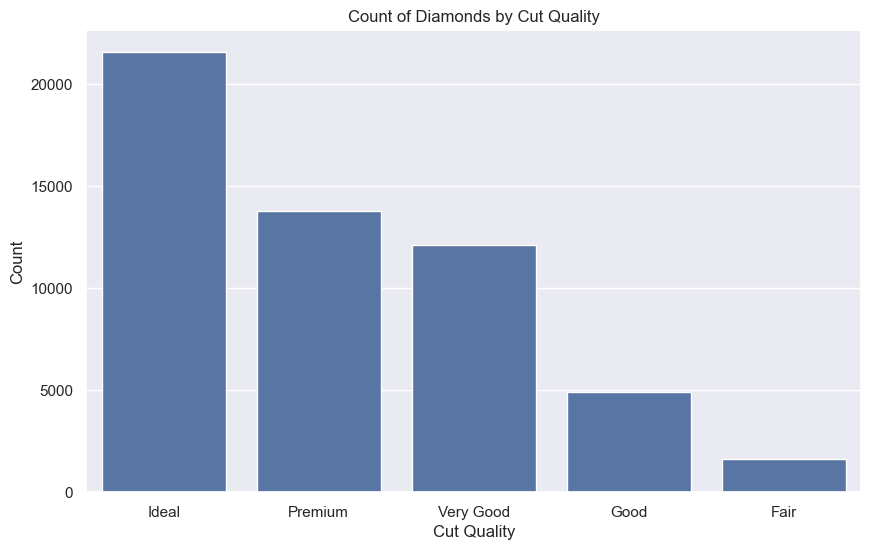

In [3]:
diamonds = sns.load_dataset("diamonds")  # Loaded in a Pandas DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(data=diamonds, x='cut', order=diamonds['cut'].value_counts().index)
plt.title('Count of Diamonds by Cut Quality')
plt.xlabel('Cut Quality')
plt.ylabel('Count')
plt.show()

## 1.0 Variable Identification

In [3]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## 2.0 Univariate Analysis

### 2.1 For continuous variables: mean, median, mode, min, max, histograms (distribution), and boxplots

In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
diamonds.describe(include=['category'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


### 2.2 For categorical variables: frequency table, count plot

In [4]:
frequency_table = diamonds['cut'].value_counts()
frequency_table


cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

## 3.0 Bi-variate Analysis

### 3.1 Continuous \& Continuous: scatter plots

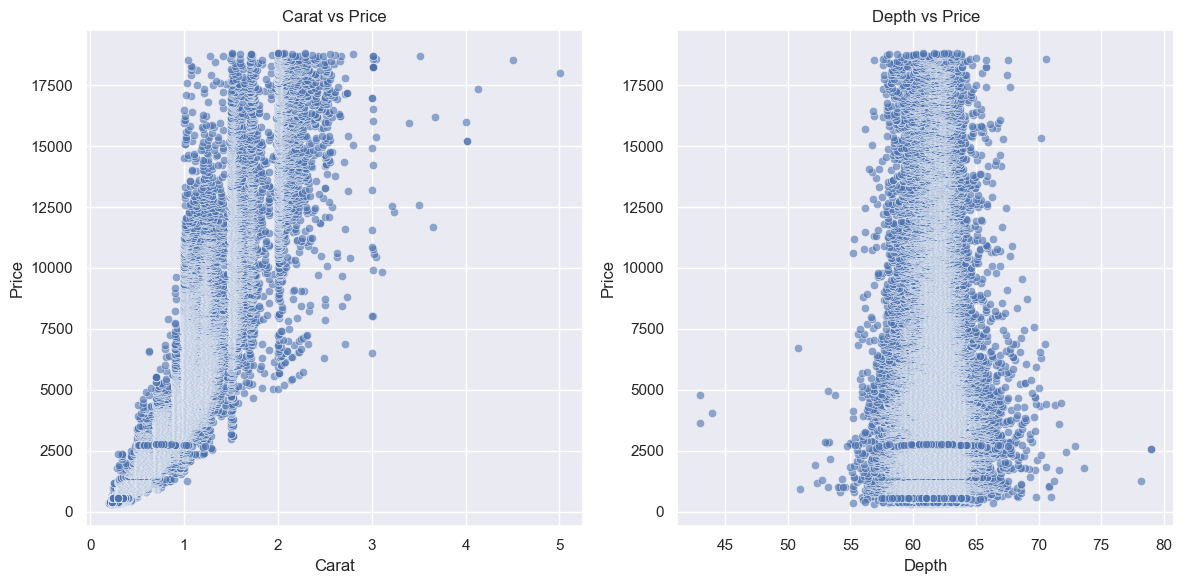

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots for continuous variables
plt.figure(figsize=(12, 6))

# Scatter plot for carat vs price
plt.subplot(1, 2, 1)
sns.scatterplot(data=diamonds, x='carat', y='price', alpha=0.6)
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')

# Scatter plot for depth vs price
plt.subplot(1, 2, 2)
sns.scatterplot(data=diamonds, x='depth', y='price', alpha=0.6)
plt.title('Depth vs Price')
plt.xlabel('Depth')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


### 3.2 Categorical & Categorical: stacked column chart

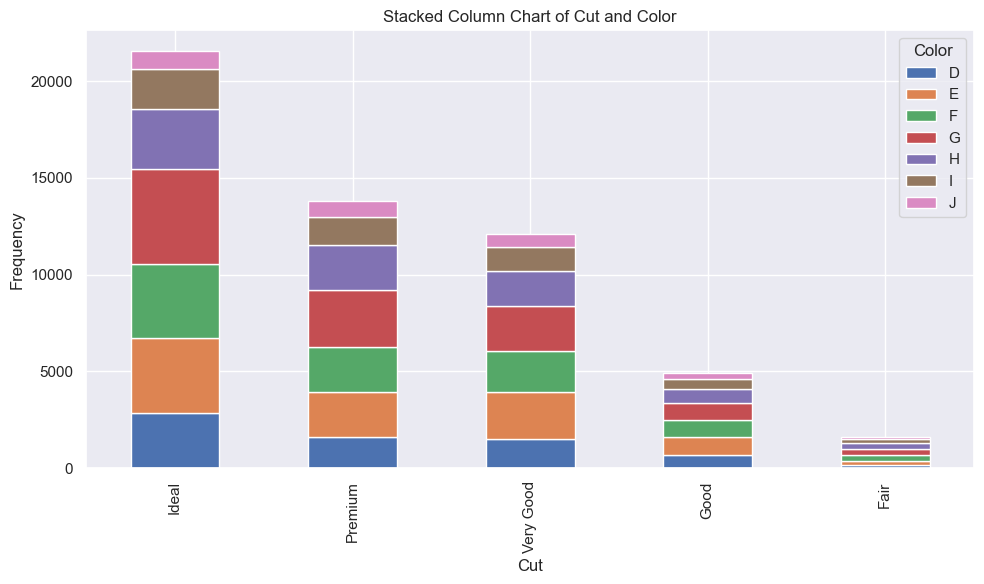

In [6]:
# Create a stacked column chart for categorical variables
plt.figure(figsize=(10, 6))
cut_color_counts = diamonds.groupby(['cut', 'color']).size().unstack()
cut_color_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Stacked Column Chart of Cut and Color')
plt.xlabel('Cut')
plt.ylabel('Frequency')
plt.legend(title='Color')
plt.tight_layout()
plt.show()


### 3.3 Categorical & Continuous: boxplots

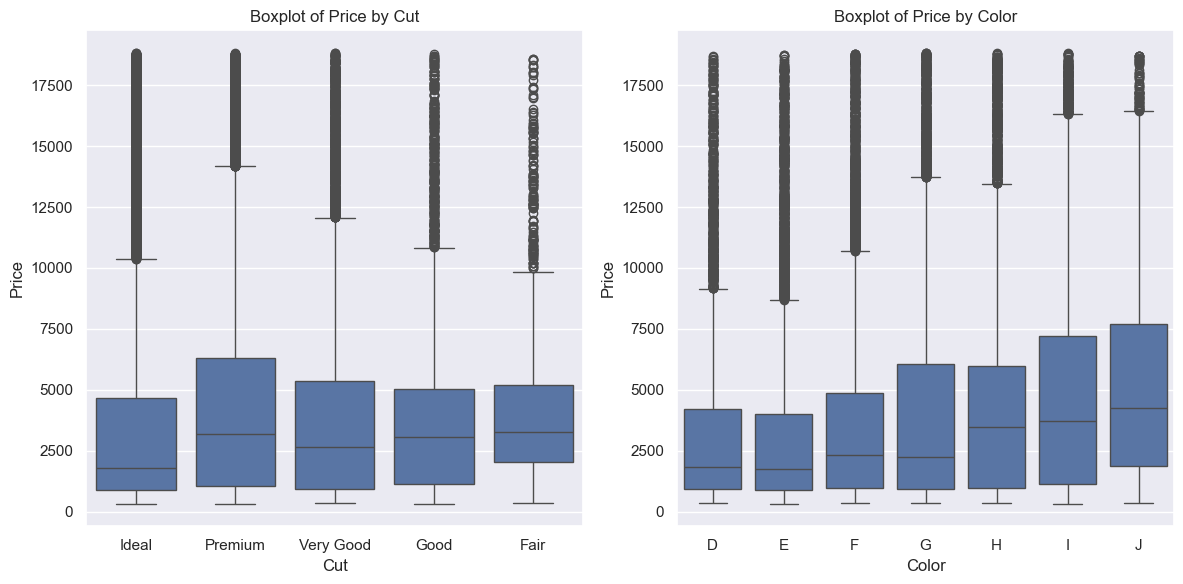

In [7]:
plt.figure(figsize=(12, 6))

# Boxplot for price by cut
plt.subplot(1, 2, 1)
sns.boxplot(data=diamonds, x='cut', y='price')
plt.title('Boxplot of Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Price')

# Boxplot for price by color
plt.subplot(1, 2, 2)
sns.boxplot(data=diamonds, x='color', y='price')
plt.title('Boxplot of Price by Color')
plt.xlabel('Color')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


### 3.4 Correlation Analysis: correlation matrix

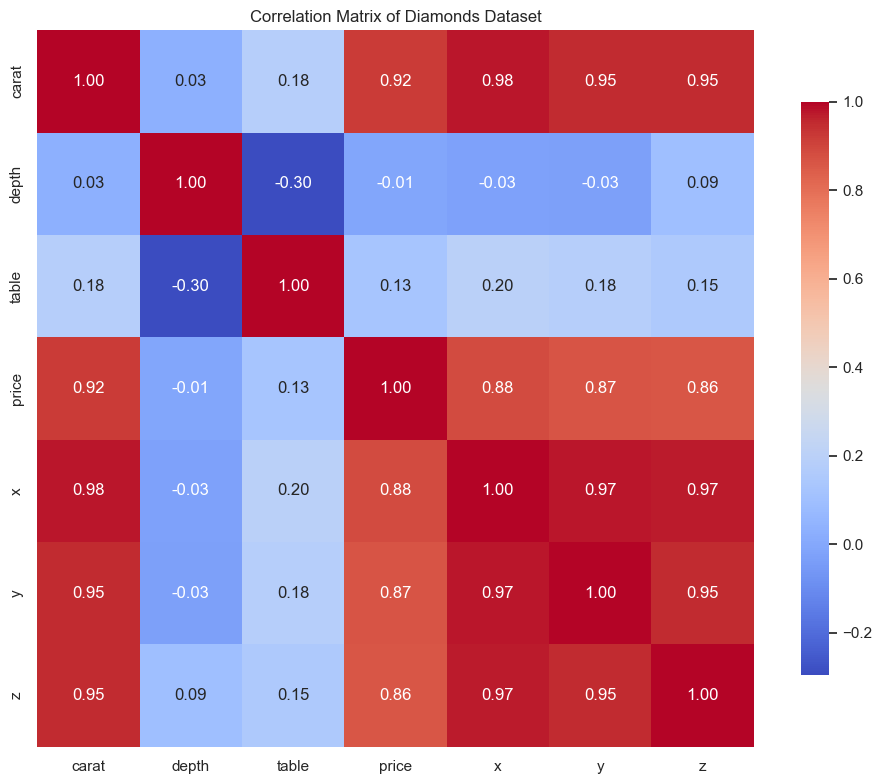

In [9]:
# To fix the error, we need to exclude non-numeric columns from the correlation matrix calculation
numeric_diamonds = diamonds.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_diamonds.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Diamonds Dataset')
plt.tight_layout()
plt.show()


## 4.0 Missing Value Analysis

In [14]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## 5.0 Outlier Analysis

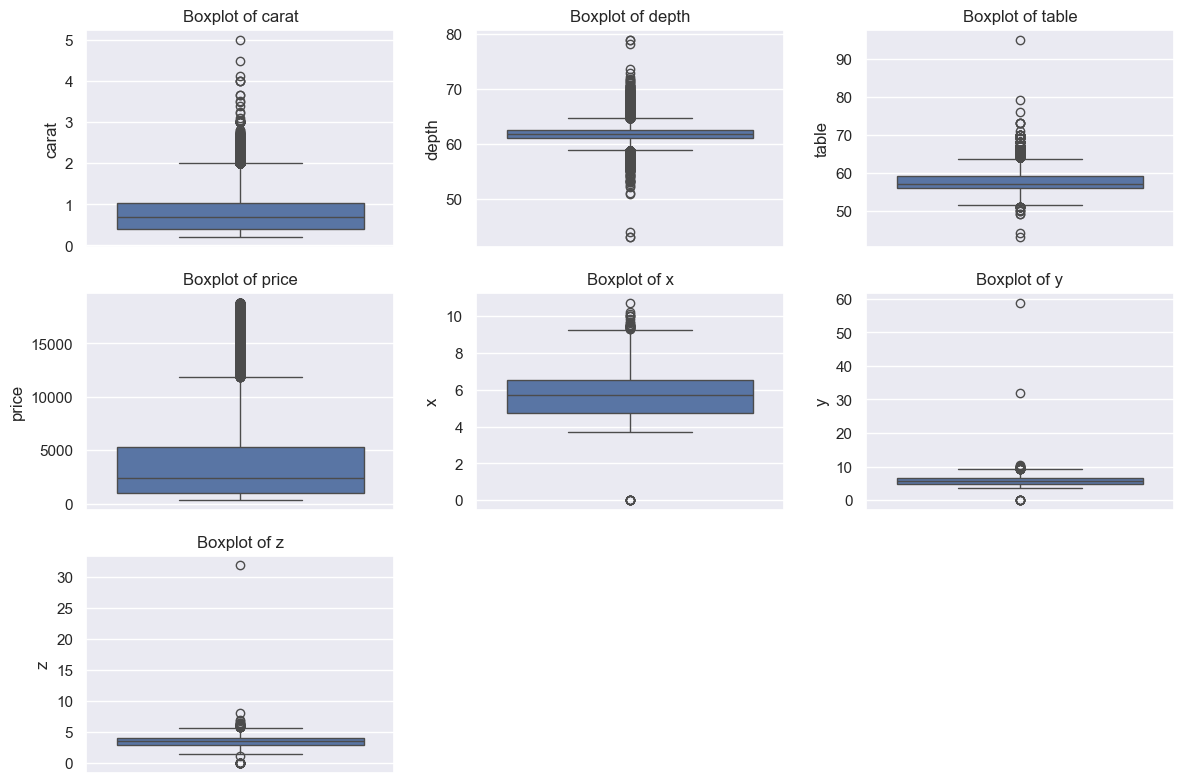

Outlier counts for each numeric feature:
carat    1889
depth    2545
table     605
price    3540
x          32
y          29
z          49
dtype: int64


In [10]:
# Outlier Analysis using boxplots for numeric features
plt.figure(figsize=(12, 8))

# Create boxplots for each numeric feature
for i, column in enumerate(numeric_diamonds.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=diamonds, y=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

# Identify outliers using the IQR method
Q1 = numeric_diamonds.quantile(0.25)
Q3 = numeric_diamonds.quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a DataFrame to hold outlier information
outliers = (numeric_diamonds < lower_bound) | (numeric_diamonds > upper_bound)

# Count the number of outliers for each feature
outlier_counts = outliers.sum()
print("Outlier counts for each numeric feature:")
print(outlier_counts)


## 6.0 Class Imbalance Analysis

**Note:** This is not a classification problem. Here the target variable is $price$. You can just explore the frequency table of some categorical variables.

In [15]:
diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64